In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# MEAN, MEDIAN, MODE

**Central tendency is defined as “the statistical measure that identifies a single value as representative of an entire distribution.**” It aims to provide an accurate description of the entire data. It is the single value that is most typical/representative of the collected data. **The term “number crunching” is used to illustrate this aspect of data description. The mean, median and mode are the three commonly used measures of central tendency.**

The mean is one of the simple methods employed in descriptive statistics used to interpret or summarize the given data set and derive relevant information or conclusion about the population or sample of a population represented by the data set.

**Mean** is the most commonly used measure of central tendency. There are different types of mean: **arithmetic mean, weighted mean, geometric mean (GM) and harmonic mean (HM)**. If mentioned without an adjective (as mean), it generally refers to the arithmetic mean.



1.   **Arithmetic Mean** is also referred to as the arithmetic average. It is calculated by summing all the observations and then dividing it by the total number of observations.  
2.   **Weighted mean** is calculated when certain values in a data set are more important than the others.
3.   **Geometric Mean** involves finding the product (log) of all observations or values and calculating the nth root of the product of the observations. The value of n indicates the total number of observations. GM’s calculation method is complex compared to AM, and GM is generally less than the AM. GM is commonly used in investment scenarios and is favorable when the observations in the sample exhibit dependence and significant fluctuations.
4.   **Harmonic Mean** formula and approach are quite different from other averages as the total number of observations or values are divided by the sum of the reciprocal (1/x) of each observation or value in the set. HM is appropriate in situations where the reciprocals of values are more useful. HM is used when we want to determine the average sample size of a number of groups, each of which has a different sample size.

If all the values in a data set are the same, then all the three means (arithmetic mean, GM and HM) will be identical. As the variability in the data increases, the difference among these means also increases. Arithmetic mean is always greater than the GM, which in turn is always greater than the HM





**The median** is the value in the middle of a data set, meaning that 50% of data points have a value smaller or equal to the median and 50% of data points have a value higher or equal to the median. For a small data set, you first count the number of data points (n) and arrange the data points in increasing order.

**The mode** is the number that occurs most often in a data set.

In [48]:
df=pd.DataFrame({"movie":["a", "b", "c", "a", "b", "c", "a", "b", "c"], "rating":[9,7,6,9,5,7,8,9,5]})

In [49]:
df.mean()

<ipython-input-49-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rating    7.222222
dtype: float64

In [50]:
df.rating.mean()

7.222222222222222

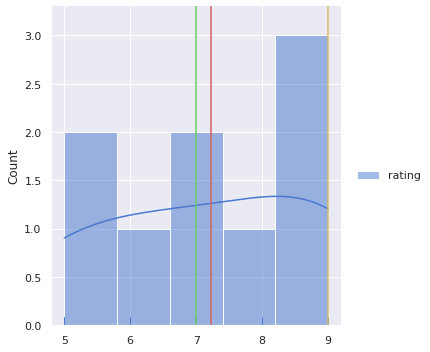

In [51]:
sns.displot(df, kde=True, rug=True)
plt.axvline(np.mean(df.rating), color="r", linestyle="-") # mean is the average of the all numbers in a dataset.
plt.axvline(np.median(df.rating), color="g", linestyle="-") # median is the middle value when dataset is ordered from least to the greatest value.
plt.axvline(df.rating.mode().values[0], color="y", linestyle="-") # mode is the number that occurs most often in a dataset. It is the most frequent value.

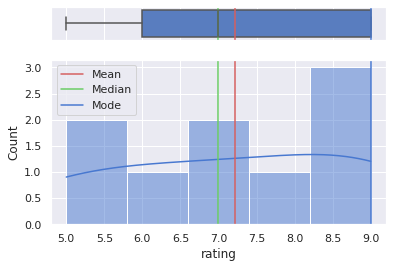

In [52]:
f, (ax_box, ax_hist)=plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.2,1)})

mean=np.mean(df.rating)           # mean is not same with average. Average can be simply defined as the sum of all the numbers divided by your total number.
median=np.median(df.rating)       # mean in statistics is defined as the mathematical average of the set of two or more data values.A mean value depends on the category it belongs. Also we have many types of mean such as hamornic and geometric.
mode=df.rating.mode().values[0]   

sns.boxplot(data=df, x="rating", ax=ax_box)
ax_box.axvline(mean, color="r", linestyle="-")
ax_box.axvline(median, color="g", linestyle="-")
ax_box.axvline(mode, color="b", linestyle="-")

sns.histplot(data=df, x="rating", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color="r", linestyle="-", label="Mean")
ax_hist.axvline(median, color="g", linestyle="-", label="Median")
ax_hist.axvline(mode, color="b", linestyle="-", label="Mode")

ax_hist.legend()
ax_box.set(xlabel="")
plt.show()

# VARIANCE AND STANDARD DEVIATION

**Variance** is a measure of how data points vary from the mean, whereas standard deviation is the measure of the distribution of statistical data. The basic difference between variance and the standard deviation is in their units. The standard deviation is represented in the same units as the mean of data, while the variance is represented in squared units.

* The variance is a measure of how spread a set of data is around its mean or average value. The symbol for it is ‘σ**2’. 
* It is always non-negative when studied in probability and statistics since each term in the variance sum is squared and therefore the result is either positive or zero.

**The standard deviation** is the measure of the average distance between values of the data in the dataset and the mean. Standard deviation is denoted by the symbol, ‘σ’.

* The smallest value of the standard deviation is 0 since it cannot be negative.
* A low standard deviation indicates that the data points tend to be very close to the mean. A high standard deviation indicates that the data points are spread over a large range of values. 

In [53]:
df.rating.var()

2.6944444444444446

In [54]:
df.rating.std()

1.6414763002993509

In [55]:
# we can also check  the standard deviation variance within the dataset for each group.
mean=df.groupby(["movie"])["rating"].mean()
std=df.groupby(["movie"])["rating"].std()

In [56]:
mean

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [57]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

<AxesSubplot:xlabel='movie'>

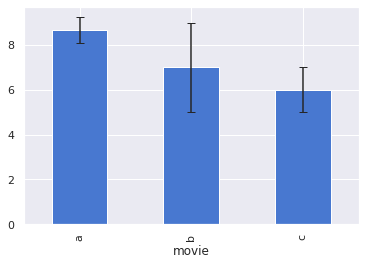

In [58]:
fig, ax=plt.subplots()
mean.plot.bar(yerr=std, ax=ax, capsize=4)

# SAMPLE AND POPULATION
Population and sample are terms commonly used in statistics to describe the percentage of measure within a certain area of focus.

* A population refers to the entire possible set of all that items within a field of focus.
* A sample refers to anly a selected portion of a population.

The smaller representative focus provide a statistician with the ability to make accurate and useful prediction without having to sample entire population.

In [59]:
df1=pd.DataFrame({"pop_sampe":range(20)})

In [60]:
df1.sample(5).mean()

pop_sampe    11.0
dtype: float64

In [61]:
df1.sample(10).mean()

pop_sampe    9.7
dtype: float64

In [62]:
df1.mean()    # when we take a sample out of population, it's mean should be very similar or very close to the mean of population.
              # otherwise, we are taking an error. There must be some biasness in the way we are taking a sample out of our main data.
              

pop_sampe    9.5
dtype: float64

In statistics, a sample mean deviates from the actual mean of a population as we have seen above. **This deviation is standard error of the mean.**

The standard error of the sample mean is an estimate of how far the sample mean is likely to be from the population mean. It tells you how much the sample mean would vary if you were to repeat a study using new samples from within a single population.

In [63]:
from scipy import stats
stats.sem(df1)

array([1.32287566])

# RANGE, QUARTILES AND INTER QUARTILE RANGE

**Range** is the difference between the smallest value and the latgest value in a data.

**Quartiles** are a set of descriptive statistics. They summarize the central tendency and variability of a dataset or distribution. Quartiles are a type of percentile. By splitting the data at the 25th, 50th, and 75th percentiles, the quartiles divide the data into four equal parts.

* The first quartile (Q1, or the lowest quartile) is the 25th percentile, meaning that 25% of the data falls below the first quartile.
* The second quartile (Q2, or the median) is the 50th percentile, meaning that 50% of the data falls below the second quartile.
* The third quartile (Q3, or the upper quartile) is the 75th percentile, meaning that 75% of the data falls below the third quartile.

**Inter quartile range, or IQR,** is the distance between the first and third quartiles—the interquartile range (IQR)—is a measure of variability. It indicates the spread of the middle 50% of the data. IQR is often seen as the better measure of the spread than the range as it is not affected by outliers.

* IQR = Q3 − Q1

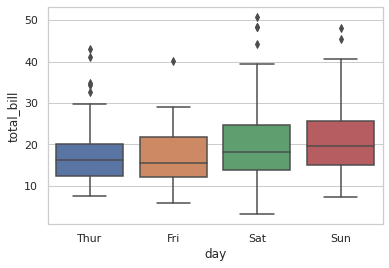

In [64]:
df2=sns.load_dataset("tips")
sns.set_theme(style="whitegrid")
ax=sns.boxplot(x="day", y="total_bill", data=df2)

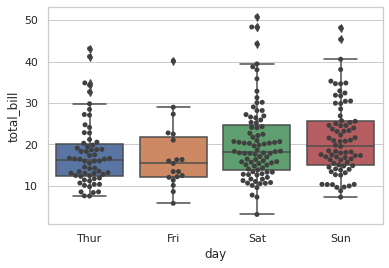

In [65]:
ax=sns.boxplot(x="day", y="total_bill", data=df2)
ax=sns.swarmplot(x="day", y="total_bill", data=df2, color="0.25")

In [66]:
print(df2["total_bill"].quantile([0.05, 0.25, 0.5, 0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [67]:
print("This is our inter quartile range (IQR): ", df2["total_bill"].quantile(0.75)-df2["total_bill"].quantile(0.25))

This is our inter quartile range (IQR):  10.779999999999998


# CORRELATION and COVARIANCE

**Correlation** is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about cause and effect.

```
# Bu, kod olarak biçimlendirilmiştir
```



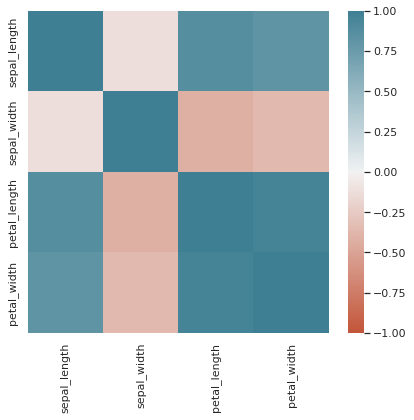

In [68]:
df3= sns.load_dataset("iris")
fig, ax=plt.subplots(figsize=(6,6))
ax=sns.heatmap(df3.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20,220,as_cmap=True), ax=ax)
plt.tight_layout()
plt.show()


**Covariance** refers to the measure of how two random variable in a dataset will change together.

* Positive covariance: Indicates that two variables tend to move in the same direction.
* Negative covariance: Reveals that two variables tend to move in inverse directions.

A large covariance can mean a strong relationship between variables. However, you can’t compare variances over data sets with different scales (like pounds and inches). A weak covariance in one data set may be a strong one in a different data set with different scales.

In [69]:
a=[11,12,22,11]
b=[7,8,9,10]
c=[10,11,22,23]
arr=np.array([a,b,c])

In [70]:
cov_matrix=np.cov(arr, bias=True)

In [71]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

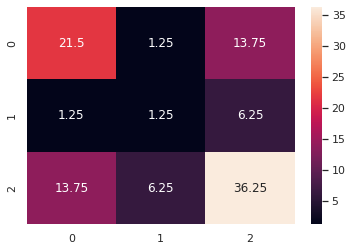

In [72]:
sns.heatmap(cov_matrix, annot=True, fmt="g")
plt.show()

**While covariance measures the direction of a relationship between two variables, correlation measures the strength of that relationship. This is usually expressed through a correlation coefficient, which can range from -1 to +1.**

**A correlation is considered strong if the correlation coefficient has a value close to +1 (positive correlation) or -1 (negative correlation). A coefficient that is close to zero indicates that there is only a weak relationship between the two variables.**

# DISTRIBUTION OF DATASET

**The distribution** of a statistical dataset is the spread of the data which shows all possible values or intervals of the data and how they occur. A distribution is simply a collection of data or scores on a variable. 

**Skewness** is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness.

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

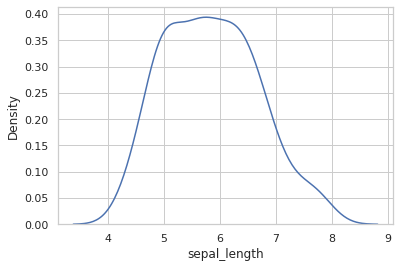

In [73]:
sns.kdeplot(df3.sepal_length)   # normal distribution of tails to see where are skewed.

In [74]:
df.skew() # The more balanced data is the higher the number towards the positive or negative, the more our data is skewed.

<ipython-input-74-51bc1829d65e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew() # The more balanced data is the higher the number towards the positive or negative, the more our data is skewed.


rating   -0.23507
dtype: float64

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

There are **three categories of kurtosis** that a set of data can display—**mesokurtic, leptokurtic, and platykurtic**. All measures of kurtosis are compared against a normal distribution curve.

*  **Mesokurtic (kurtosis = 3.0)** - The first category of kurtosis is mesokurtic distribution. This distribution has a kurtosis similar to that of the normal distribution, meaning the extreme value characteristic of the distribution is similar to that of a normal distribution. 

* **Leptokurtic (kurtosis > 3.0)** - The second category is leptokurtic distribution. Any distribution that is leptokurtic displays greater kurtosis than a mesokurtic distribution. This distribution appears as a curve one with long tails (outliers.) The "skinniness" of a leptokurtic distribution is a consequence of the outliers, which stretch the horizontal axis of the histogram graph, making the bulk of the data appear in a narrow ("skinny") vertical range.

* **Platykurtic (kurtosis < 3.0)** - The final type of distribution is platykurtic distribution. These types of distributions have short tails (fewer outliers.). Platykurtic distributions have demonstrated more stability than other curves because extreme price movements rarely occurred in the past. This translates into a less-than-moderate level of risk.


In [75]:
df.kurtosis()  # Positive values of greater than three presents fatter tail in towards where the values are skewed on the right or the left.
               # Negative values in kurtosis indicates the distributions are having tail which is thinner than the normal distribution.
               # Normal distribution, also known as gaussian distribution, is the probability distribution that is symmetric around the mean showing that data near the mean are frequent in occurance than a data far from the mean.
               

<ipython-input-75-04751c24841b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()  # Positive values of greater than three presents fatter tail in towards where the values are skewed on the right or the left.


rating   -1.570351
dtype: float64

#### DENSITY FUNCTIONS
One of the critical things in any study related to distributions is Density functions. **The density functions** are mathematical functions that describe the probability distribution of a random variable X.

* **Probability Mass Function (PMF)** describe the probability of a random variable X taking on a particular value x, and It is only applicable for discrete distributions. (Rasgele secilen bir X değişkeninin belirli bir x değeri çıkma ihtimali)

* **Probability Density Function (PDF)** is PMF equivalent but for continuous random variables. A continuous distribution is characterised by infinite numbers of the random variables, which means the probability of any random sample at a given point is infinitesimally low. So, a range of values is used to infer the likelihood of a random sample. And doing an integration over the range will fetch our likelihood for the same sample.

* **A cumulative density function** at x explains the probability of a random variable X taking on values less than or equal to x. It applies to distribution regardless of its type, continuous or discrete. For a constant distribution, all we need to do is integrate the density function from negative infinity to x.

We will divide these Probability distributions based on whether the data is discrete (shown with dots in a graph) or continuous (shown with line in a graph).

* **Discrete**
1. Bernoulli Distribution
2. Binomial Distribution
3. Poisson Distribution

* **Continuous**
1. Normal Distribution
2. chi2 Distribution
3. Student-t Distribution
4. Log-Normal Distribution
5. Exponential Distribution





###**Probability Distribution for Discrete datasets**

**1. Bernoulli Distribution** can be safely assumed to be the simplest 0f discrete distributions. Consider an example of flipping an unbiased coin. You either get a Head or a Tail. If we consider either of them as our priority(caring only about Head/Tail), the outcome will only be 0 (failure) or 1 (success). As it is an unbiased coin probability assigned to each outcome is 0.5. Remember, the outcome is always binary True/False, Head/Tail, Success/Failure etc.

<AxesSubplot:>

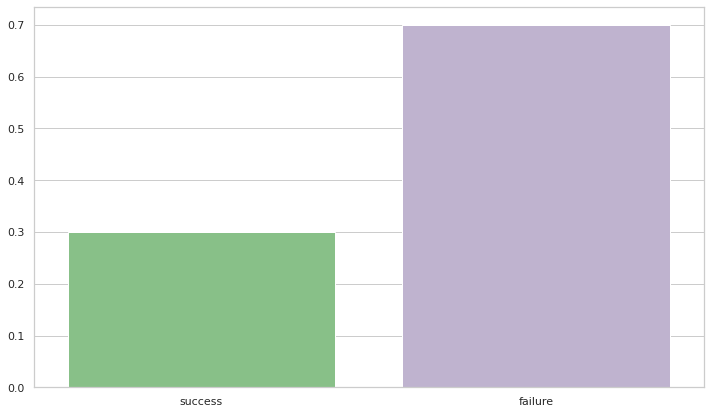

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Accent')
fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(y=[0.3,0.7], x = ['success','failure'],)

**2. Binomial Distribution** is simply an extension of Bernoulli distribution. If we repeat Bernoulli trials for n times, we will get a Binomial distribution. If we want to model the number of successes in n trials, we use Binomial Distribution. As each unit of Binomial is a Bernoulli trial, the outcome is always binary. The observations are independent of each other.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

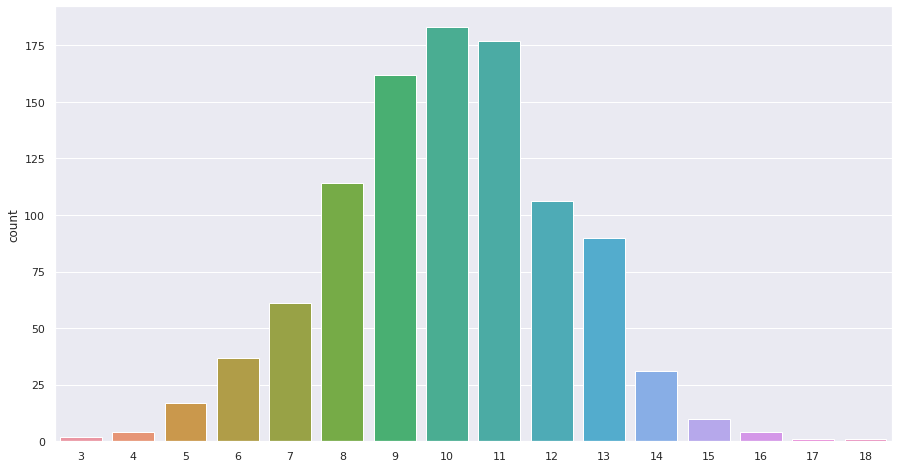

In [77]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid", palette="muted")
fig,ax = plt.subplots(figsize=(15,8))
binomial = np.random.binomial(20,0.5,1000)
sns.countplot(binomial)

**3. Poisson Distribution** describes the probability of a given number of events occurring in a fixed interval, for example, the number of unique pageviews on an article on a given day or the number of customers visiting a florist shop at a particular time. It is not just limited to time intervals, and we can also extend its use to the area, length and volume intervals.

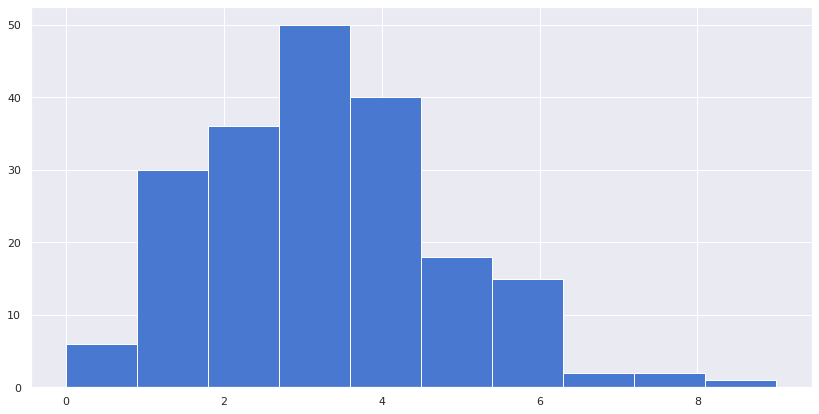

In [78]:
from scipy.stats import poisson
sns.set(style="darkgrid", palette="muted")
res = poisson.rvs(mu=3, size=200)
fig,ax = plt.subplots(figsize=(14,7))
plt.hist(x=res,)
plt.show()

###**Probability Distribution for Continuous datasets**

**1. Normal Distribution** is the most common and naturally occurring distribution. It is otherwise also known as Gaussian Distribution. As the distance increases from either side of the mean, the probability decreases.

The shape of the distribution resembles that of a classic bell, and hence it is called a bell-shaped curve. The curve is symmetric about its mean, and the variance defines the thickness of the distribution.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

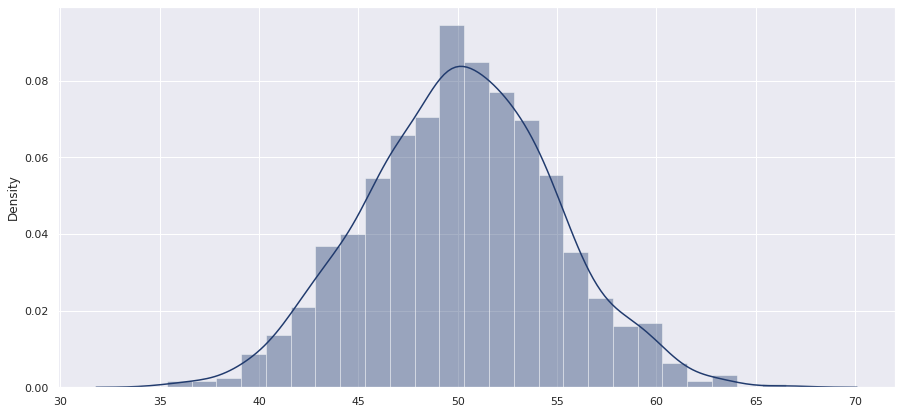

In [79]:
nums = np.random.normal(50, 5, 1000)
sns.set(style="darkgrid", palette="cividis",)
fig,ax = plt.subplots(figsize=(15,7))
sns.distplot(nums)

**2. A chi-square distribution** can be defined as the distribution of the sum of the squares of v random variables drawn from a Gaussian or Normal distribution. The value v is also the degree of freedom of the distribution and the only parameter. For example, if 20 random variables are drawn from a normal distribution, the degree of freedom will be 20.

Unlike other distributions we have studied so far, the chi-square distribution doesn’t occur naturally. It is a theoretical distribution where the observations are calculated from the observations of a Normal distribution. The chi-square distribution is typically used in statistical significance testing where the underlying distribution is Normal.

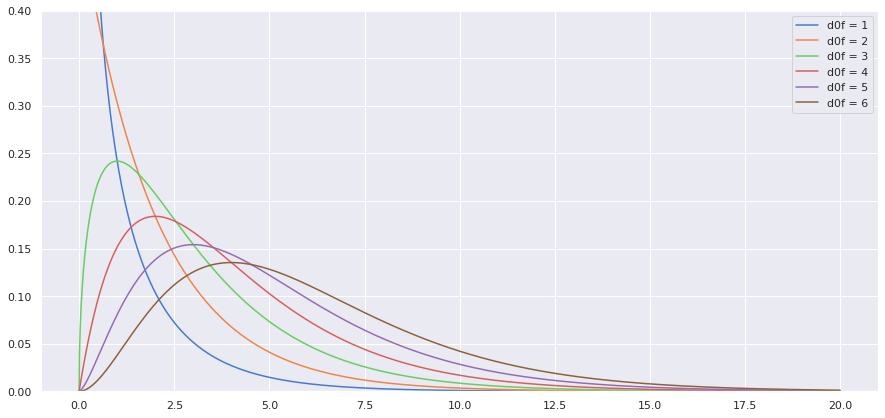

In [80]:
# Plotting pdfs

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
import seaborn as sns
sample_space = np.arange(0, 20, 0.01)
sns.set(style="darkgrid", palette="muted")
fig,ax = plt.subplots(figsize=(15,7))
for dof in [1,2,3,4,5,6]:
  pdf = chi2.pdf(sample_space, dof)
  plt.ylim(0,0.4)
  sns.lineplot(x=sample_space, y = pdf, label= f'd0f = {dof}')    #d0f: degree of freedom
plt.show()

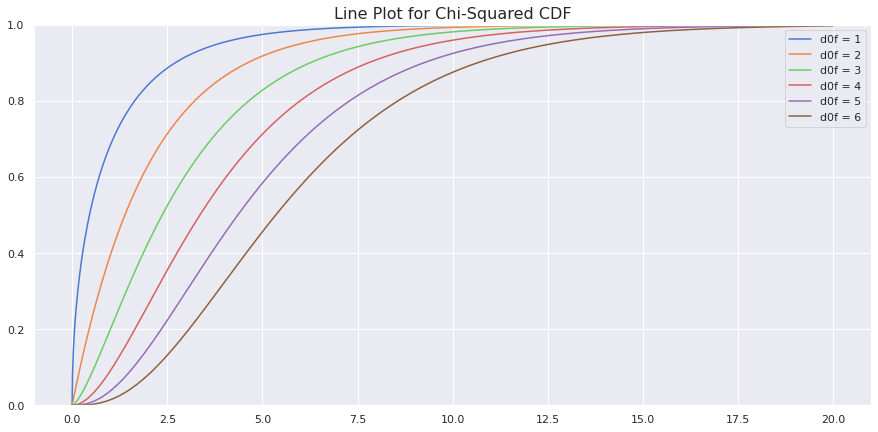

In [81]:
# Plotting CDF
sample_space = np.arange(0, 20, 0.01)
sns.set(style="darkgrid", palette="muted")
fig,ax = plt.subplots(figsize=(15,7))
for dof in [1,2,3,4,5,6]:
  cdf = chi2.cdf(sample_space, dof)
  plt.ylim(0,1)
  sns.lineplot(x=sample_space, y = cdf, label= f'd0f = {dof}')         #d0f: degree of freedom
plt.title('Line Plot for Chi-Squared CDF',fontdict={'fontsize':16})
plt.show()

**3. Students’ t-distribution or t distribution** is predominantly used in significance testing and construction of confidence intervals. Just as chi-squared distribution, t-distribution also doesn’t occur naturally. This distribution arises while estimating the mean of a normal distribution when the population parameters are unknown, and the sample size is relatively small.

The only parameter for t-distribution is the degree of freedom. If n is the number of samples drawn from a normal distribution, then the degree of freedom is n-1.

<AxesSubplot:>

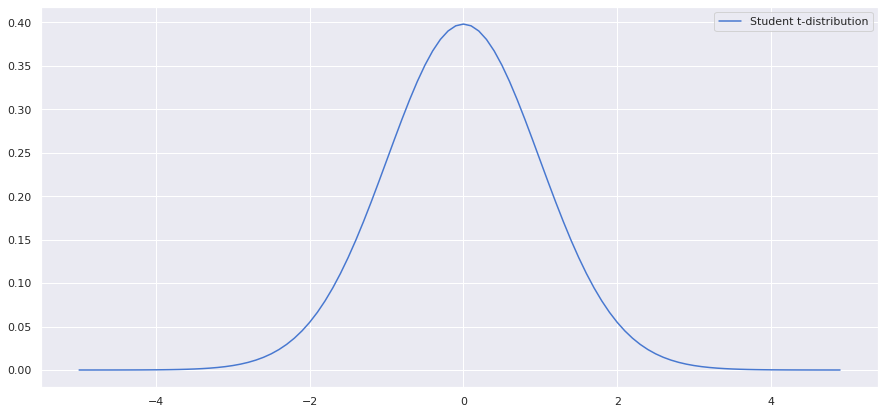

In [82]:
from scipy.stats import norm
from scipy.stats import t
sample_space = np.arange(-5, 5, 0.1)
dof = len(sample_space) - 1
fig,ax = plt.subplots(figsize=(15,7))
sns.lineplot(x = sample_space, y = t.pdf(sample_space,dof), label ='Student t-distribution')

Text(0.5, 1.0, 'Comparing Normal with t-distribution')

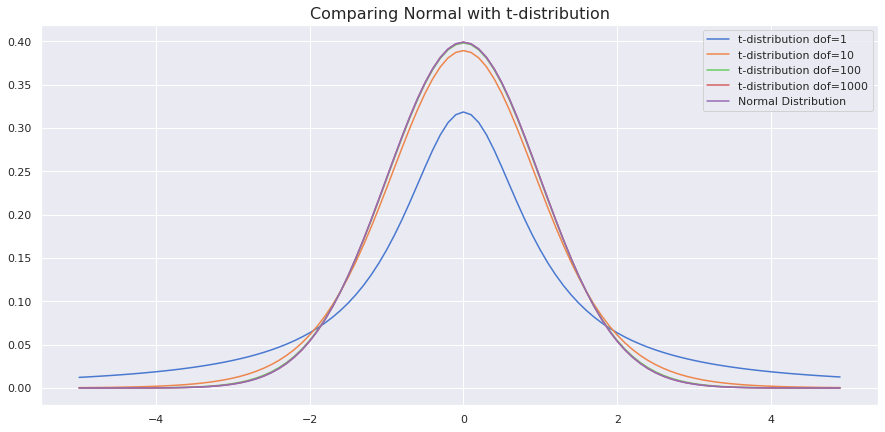

In [83]:
from scipy.stats import t
sample_space = np.arange(-5, 5, 0.1)
dof = len(sample_space) - 1
fig,ax = plt.subplots(figsize=(15,7))
sns.lineplot(x = sample_space, y = t.pdf(sample_space,1), label ='t-distribution dof=1')
sns.lineplot(x = sample_space, y = t.pdf(sample_space,10), label ='t-distribution dof=10')
sns.lineplot(x = sample_space, y = t.pdf(sample_space,100), label ='t-distribution dof=100')
sns.lineplot(x = sample_space, y = t.pdf(sample_space,1000), label ='t-distribution dof=1000')
sns.lineplot(x = sample_space, y = norm.pdf(sample_space,0,1), label = 'Normal Distribution')
plt.title('Comparing Normal with t-distribution', fontdict={'size':16})

Text(0.5, 1.0, 'Comapring Normal with t-distribution')

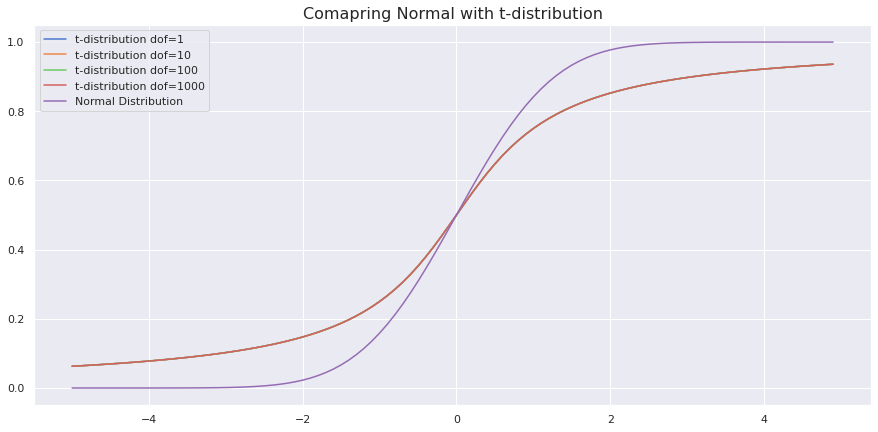

In [84]:
# Comparing CDF
from scipy.stats import t
sample_space = np.arange(-5, 5, 0.1)
dof = len(sample_space) - 1
fig,ax = plt.subplots(figsize=(15,7))
#t-sidtrribution plot
for  dof in [1,10,100,1000]:
  sns.lineplot(x = sample_space, y = t.cdf(sample_space,1), label =f't-distribution dof={dof}')
#normal distribution plot
sns.lineplot(x = sample_space, y = norm.cdf(sample_space,0,1), label = 'Normal Distribution')
plt.title('Comapring Normal with t-distribution', fontdict={'size':16})

**4. The log-Normal distribution** is a continuous distribution of random variables, whereas the natural logarithm of these random variables is a Normal distribution. So, if X is any log-normally distributed random variable, then ln(X) follows a Normal distribution. A Log-Normal distribution always yields positive values as opposed to Normal distribution. The log-normal distribution is used where we do not want to let go of the convenience of Normal Distribution yet want only positive outcomes. 

**5. The exponential distribution** is often associated with the time elapsed until some event happens. The events within the time interval occur continuously and at an average constant rate. If you know high school chemistry, then chemical first-order reaction r time until a radioactive substance decays follow an exponential distribution. A more general example could be amount of months a car battery lasts.

# CENTRAL LIMIT TEOREM AND CONDIFENCE INTERVAL

**The central limit teorem** is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all the samples from the same population will be approximately equal to mean of the total population for them. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variants being approximately equal to the variance of the population divided by its sample size.


**Confidence intervals** allow us to find a range of values where we can be relatively confident the true value will be. For example, the confidence interval of 95% defines a range of values that you can be 95% certain contains the population mean with the large samples so that the sample will be much more precise than you do with a small sample. SO the confidence interval is quite narrow when computed from the population mean, or a large sample. The confidence and confidence interval can be calculated in a very precise manner.

In [85]:
import statsmodels.stats.api as sms 
sms.DescrStatsW(df3.sepal_length).tconfint_mean()     # the confidence interval is between the output range.

(5.709732481507366, 5.976934185159301)